In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

In [400]:
players = pd.read_csv('/Users/adamjj/Desktop/IntroPython&SQL_project/db/players.csv', sep=',')

In [401]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     338 non-null    int64 
 1   Name           338 non-null    object
 2   Date_of_birth  338 non-null    object
 3   Height_cm      338 non-null    int64 
 4   Position       338 non-null    object
 5   Market_value   338 non-null    int64 
 6   Better_foot    338 non-null    object
 7   Team_ID        338 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 21.2+ KB


In [402]:
players.head()

,Unnamed: 0,Name,Date_of_birth,Height_cm,Position,Market_value,Better_foot,Team_ID
0,0,Wojciech Szczesny,"Apr 18, 1990 (32)",196,Goalkeeper,15000000,R,1
1,1,Bartlomiej Dragowski,"Aug 19, 1997 (24)",191,Goalkeeper,6000000,R,1
2,2,Lukasz Skorupski,"May 5, 1991 (31)",187,Goalkeeper,4000000,R,1
3,3,Kamil Grabara,"Jan 8, 1999 (23)",195,Goalkeeper,4000000,R,1
4,4,Jan Bednarek,"Apr 12, 1996 (26)",189,Centre-Back,22000000,R,1


In [403]:
players.columns

Index(['Unnamed: 0', 'Name', 'Date_of_birth', 'Height_cm', 'Position',
       'Market_value', 'Better_foot', 'Team_ID'],
      dtype='object')

In [404]:
players.drop('Unnamed: 0',axis=1,inplace=True)

In [405]:
players.isnull().sum()

Name             0
Date_of_birth    0
Height_cm        0
Position         0
Market_value     0
Better_foot      0
Team_ID          0
dtype: int64

In [406]:
players.columns

Index(['Name', 'Date_of_birth', 'Height_cm', 'Position', 'Market_value',
       'Better_foot', 'Team_ID'],
      dtype='object')

In [407]:
players.nlargest(15, ['Market_value'])

,Name,Date_of_birth,Height_cm,Position,Market_value,Better_foot,Team_ID
241,Rodri,"Jun 22, 1996 (26)",191,Defensive Midfield,80000000,R,5
244,Pedri,"Nov 25, 2002 (19)",174,Central Midfield,80000000,R,5
273,Joshua Kimmich,"Feb 8, 1995 (27)",177,Defensive Midfield,80000000,R,6
73,Lautaro Martinez,"Aug 22, 1997 (24)",174,Centre-Forward,75000000,R,0
279,Kai Havertz,"Jun 11, 1999 (23)",190,Attacking Midfield,70000000,L,6
276,Leon Goretzka,"Feb 6, 1995 (27)",189,Central Midfield,65000000,R,6
280,Jamal Musiala,"Feb 26, 2003 (19)",184,Attacking Midfield,65000000,R,6
285,Serge Gnabry,"Jul 14, 1995 (26)",176,Right Winger,65000000,R,6
245,Gavi,"Aug 5, 2004 (17)",173,Central Midfield,60000000,R,5
250,Ansu Fati,"Oct 31, 2002 (19)",178,Left Winger,60000000,R,5


In [408]:
players_top_value = players.nlargest(15, ['Market_value'])

plot_1 = go.Bar(
                x = players_top_value.Name,
                y = players_top_value.Market_value,
                marker = dict(color = '#a1435f',
                line=dict(color='rgb(0,0,0)',width=1.5)),
                text = players_top_value.Position)

data = [plot_1]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig.update_layout(yaxis_range=[25000000,85000000])
fig.update_layout(
    title="Top 15 players with the highest market value",
    xaxis_title="Players",
    yaxis_title="Market value",
)
iplot(fig)

In [409]:
players_tallest = players.nlargest(15, ['Height_cm'])

trace1 = go.Bar(
                y = players_tallest.Name,
                x = players_tallest.Height_cm,
                marker = dict(color = '#63C085',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = players_tallest.Position,
                orientation='h')

data = [trace1]
layout = go.Layout(barmode = "group")
fig2 = go.Figure(data = data, layout = layout)
fig2.update_layout(xaxis_range=[185,200])
fig2.update_layout(
    title="Top 15 tallest players",
    xaxis_title="Height",
    yaxis_title="Players",
)
iplot(fig2)

In [410]:
teams = pd.read_csv('/Users/adamjj/Desktop/IntroPython&SQL_project/db/teams.csv', sep=',')

In [411]:
teams

,Unnamed: 0,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
0,0,Argentina,Lionel Scaloni,Lionel Messi,C,2,0,1,5,2,6
1,1,Poland,Czeslaw Michniewicz,Robert Lewandowski,C,1,1,1,2,2,4
2,2,Mexico,Gerardo Martino,Andres Guardado,C,1,1,1,2,3,4
3,3,Saudi Arabia,Herve Renard,Salman Al-Faraj,C,1,0,2,3,5,3
4,4,Japan,Hajime Moriyasu,Maya Yoshida,E,2,0,1,4,3,6
5,5,Spain,Luis de la Fuente,Sergio Busquets,E,1,1,1,9,3,4
6,6,Germany,Hansi Flick,Manuel Neuer,E,1,1,1,6,5,4
7,7,Costa Rica,Luis Fernando Suarez,Bryan Ruiz,E,1,0,2,3,11,3


In [412]:
teams.drop('Unnamed: 0',axis=1,inplace=True)

In [413]:
teams

,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
0,Argentina,Lionel Scaloni,Lionel Messi,C,2,0,1,5,2,6
1,Poland,Czeslaw Michniewicz,Robert Lewandowski,C,1,1,1,2,2,4
2,Mexico,Gerardo Martino,Andres Guardado,C,1,1,1,2,3,4
3,Saudi Arabia,Herve Renard,Salman Al-Faraj,C,1,0,2,3,5,3
4,Japan,Hajime Moriyasu,Maya Yoshida,E,2,0,1,4,3,6
5,Spain,Luis de la Fuente,Sergio Busquets,E,1,1,1,9,3,4
6,Germany,Hansi Flick,Manuel Neuer,E,1,1,1,6,5,4
7,Costa Rica,Luis Fernando Suarez,Bryan Ruiz,E,1,0,2,3,11,3


In [414]:
team_names = teams['Team_name']

In [415]:
teams_grpd_height = players[['Height_cm', 'Market_value' ,'Team_ID']]
teams_grpd_height = players.groupby(['Team_ID']).mean()

In [416]:
teams_grpd_height

,Height_cm,Market_value
Team_ID,,
0,179.437500,2.259375e+07
1,183.930233,7.565116e+06
2,177.909091,4.784848e+06
3,178.529412,1.108088e+06
4,179.384615,3.025962e+06
5,181.677419,3.075806e+07
6,185.600000,2.807143e+07
7,180.977778,6.772222e+05


In [417]:
teams_grpd_height['Team_Name'] = team_names

In [418]:
teams_grpd_height

,Height_cm,Market_value,Team_Name
Team_ID,,,
0,179.437500,2.259375e+07,Argentina
1,183.930233,7.565116e+06,Poland
2,177.909091,4.784848e+06,Mexico
3,178.529412,1.108088e+06,Saudi Arabia
4,179.384615,3.025962e+06,Japan
5,181.677419,3.075806e+07,Spain
6,185.600000,2.807143e+07,Germany
7,180.977778,6.772222e+05,Costa Rica


In [419]:
teams_grpd_height.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Height_cm     8 non-null      float64
 1   Market_value  8 non-null      float64
 2   Team_Name     8 non-null      object 
dtypes: float64(2), object(1)
memory usage: 256.0+ bytes


Text(0.5, 1.0, 'Average players height by each team (country)')

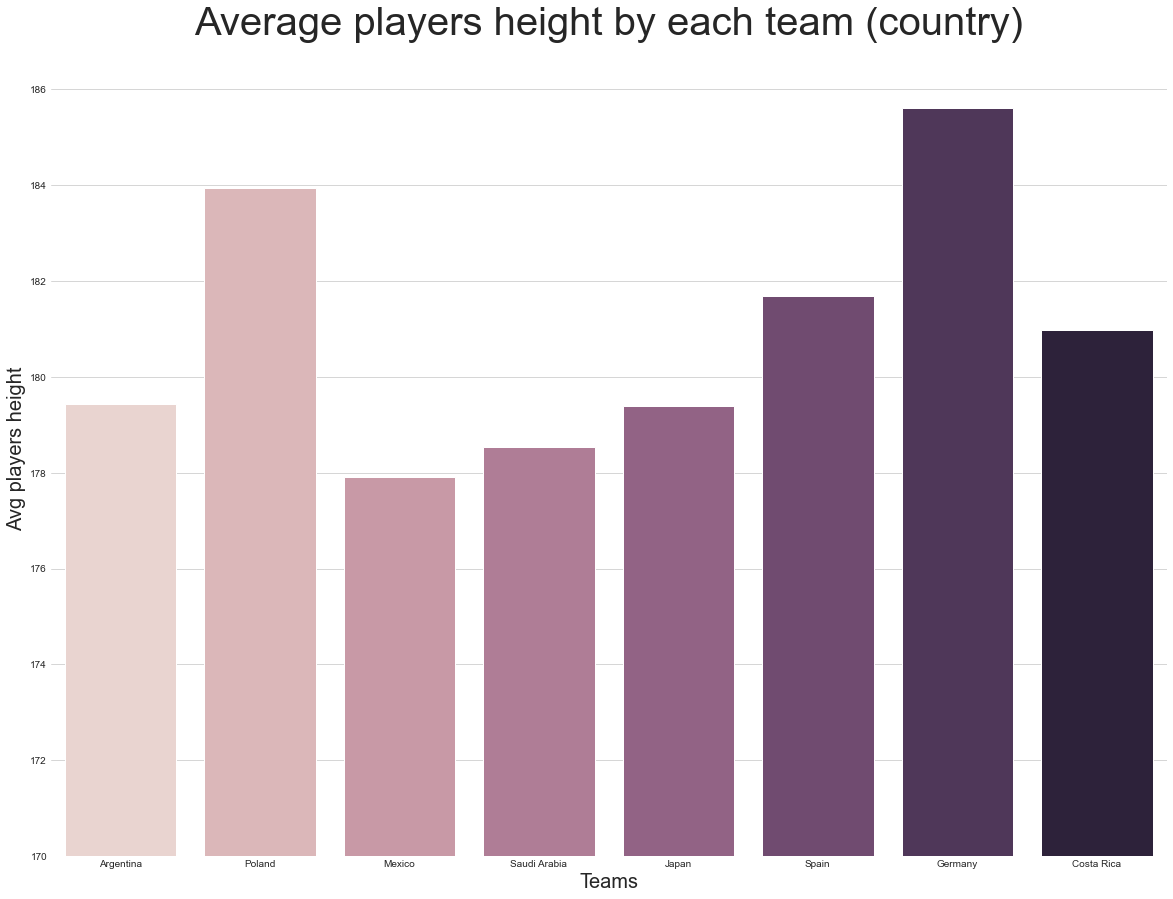

In [420]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
ax= sns.barplot(x=teams_grpd_height['Team_Name'], y=teams_grpd_height['Height_cm'], palette = sns.cubehelix_palette(len(teams_grpd_height['Team_Name'])))
plt.ylim(170, 187)
plt.xlabel('Teams', fontsize=20)
plt.ylabel('Avg players height', fontsize=20)
plt.title('Average players height by each team (country)', fontsize=40)

In [421]:
teams_grpd_value = players[['Market_value' ,'Team_ID']]

In [422]:
teams_grpd_value = players.groupby(['Team_ID']).sum()

In [423]:
teams_grpd_value['Team_Name'] = team_names

In [424]:
teams_grpd_value

,Height_cm,Market_value,Team_Name
Team_ID,,,
0,5742,723000000,Argentina
1,7909,325300000,Poland
2,11742,315800000,Mexico
3,6070,37675000,Saudi Arabia
4,9328,157350000,Japan
5,5632,953500000,Spain
6,6496,982500000,Germany
7,8144,30475000,Costa Rica


In [425]:
import plotly.express as px

print(px.colors.qualitative.Pastel)

['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)']


In [426]:
teams_grpd_value = teams_grpd_value.sort_values(by=['Market_value'], ascending=True)

In [427]:
teams_grpd_value

,Height_cm,Market_value,Team_Name
Team_ID,,,
7,8144,30475000,Costa Rica
3,6070,37675000,Saudi Arabia
4,9328,157350000,Japan
2,11742,315800000,Mexico
1,7909,325300000,Poland
0,5742,723000000,Argentina
5,5632,953500000,Spain
6,6496,982500000,Germany


Text(0.5, 1.0, 'Market value of teams (countries)')

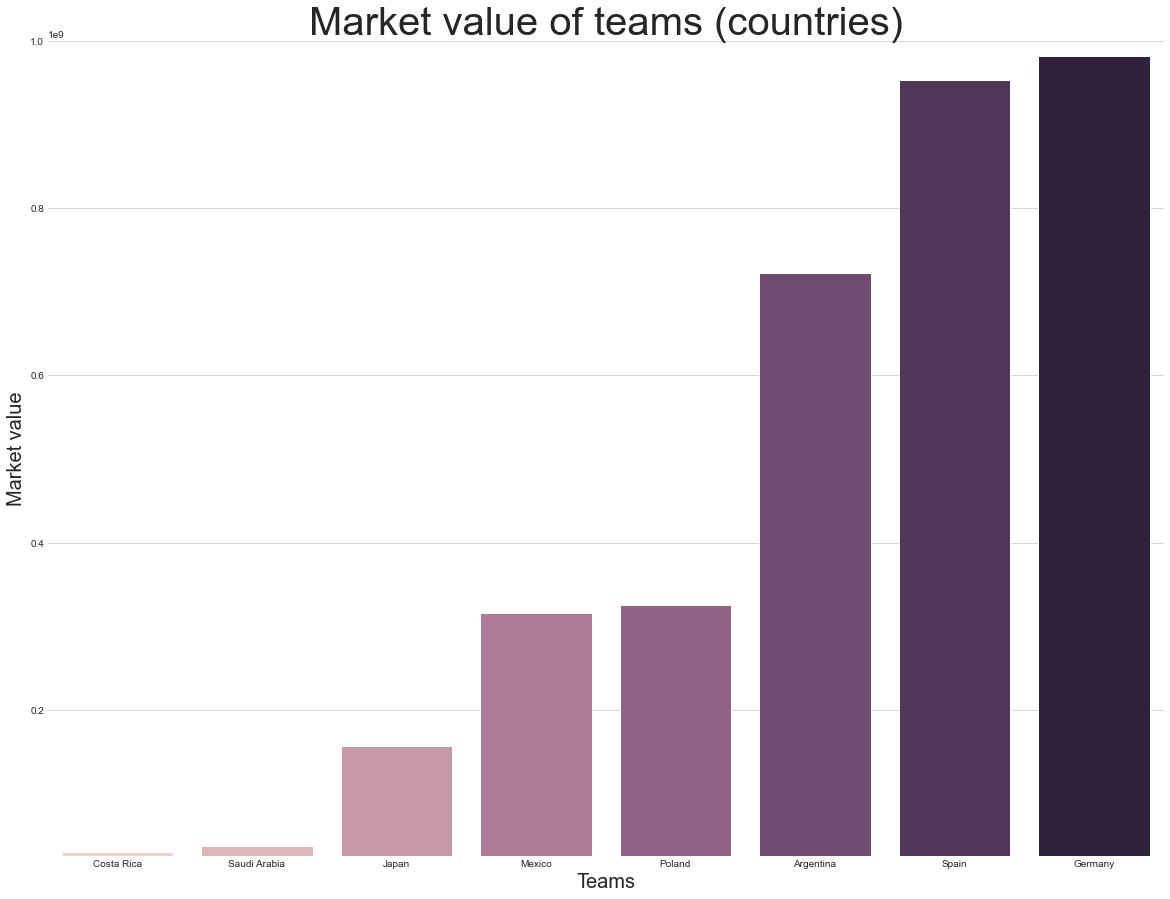

In [428]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
ax= sns.barplot(x=teams_grpd_value['Team_Name'], y=teams_grpd_value['Market_value'], palette = sns.cubehelix_palette(len(teams_grpd_value['Team_Name'])))
plt.ylim(25000000, 1000000000)
plt.xlabel('Teams', fontsize=20)
plt.ylabel('Market value', fontsize=20)
plt.title('Market value of teams (countries)', fontsize=40)

In [429]:
trace1 = go.Bar(
                x = teams_grpd_value.Market_value,
                y = teams_grpd_value.Team_Name,
                marker = dict(color = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)'],
                line=dict(color='rgb(0,0,0)',width=1.5)),
                text = teams.Coach,
                orientation='h')

data = [trace1]
layout = go.Layout(barmode = "group")
fig3 = go.Figure(data = data, layout = layout)
fig3.update_layout(
    title="Market value of teams (countries)",
    xaxis_title="Market value",
    yaxis_title="Teams",
)
iplot(fig3)

In [430]:
teams

,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
0,Argentina,Lionel Scaloni,Lionel Messi,C,2,0,1,5,2,6
1,Poland,Czeslaw Michniewicz,Robert Lewandowski,C,1,1,1,2,2,4
2,Mexico,Gerardo Martino,Andres Guardado,C,1,1,1,2,3,4
3,Saudi Arabia,Herve Renard,Salman Al-Faraj,C,1,0,2,3,5,3
4,Japan,Hajime Moriyasu,Maya Yoshida,E,2,0,1,4,3,6
5,Spain,Luis de la Fuente,Sergio Busquets,E,1,1,1,9,3,4
6,Germany,Hansi Flick,Manuel Neuer,E,1,1,1,6,5,4
7,Costa Rica,Luis Fernando Suarez,Bryan Ruiz,E,1,0,2,3,11,3


In [431]:
group_c = teams[teams['Group_letter']=='C']

In [432]:
group_c

,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
0,Argentina,Lionel Scaloni,Lionel Messi,C,2,0,1,5,2,6
1,Poland,Czeslaw Michniewicz,Robert Lewandowski,C,1,1,1,2,2,4
2,Mexico,Gerardo Martino,Andres Guardado,C,1,1,1,2,3,4
3,Saudi Arabia,Herve Renard,Salman Al-Faraj,C,1,0,2,3,5,3


In [433]:
group_e = teams[teams['Group_letter']=='E']
group_e

,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
4,Japan,Hajime Moriyasu,Maya Yoshida,E,2,0,1,4,3,6
5,Spain,Luis de la Fuente,Sergio Busquets,E,1,1,1,9,3,4
6,Germany,Hansi Flick,Manuel Neuer,E,1,1,1,6,5,4
7,Costa Rica,Luis Fernando Suarez,Bryan Ruiz,E,1,0,2,3,11,3


In [434]:
stadiums = pd.read_csv('/Users/adamjj/Desktop/IntroPython&SQL_project/db/stadiums.csv', sep=',')

In [435]:
stadiums = stadiums.sort_values(by=['Capacity'], ascending=True)

In [438]:
stadiums

,Unnamed: 0,Stadium_name,City,Capacity
7,7,Stadium 974,Al Thumama Stadium,44089
3,3,Al Janoub Stadium,Al Wakrah,44325
4,4,Al Thumama Stadium,Al Thumama Stadium,44400
5,5,Education City Stadium,Al Rayyan,44667
2,2,Ahmad Bin Ali Stadium,Umm Al Afaei,45032
6,6,Khalifa International Stadium,Aspire,45857
0,0,Al Bayt Stadium,Al Khor City,68895
1,1,Lusail Stadium,Lusail City,88966


In [436]:
print(px.colors.qualitative.Plotly)

['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']


In [437]:
trace1 = go.Bar(
                y = stadiums.Stadium_name,
                x = stadiums.Capacity,
                marker = dict(color = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880'],
                line=dict(color='rgb(0,0,0)',width=1.5)),
                text = stadiums.City,
                orientation='h')

data = [trace1]
layout = go.Layout(barmode = "group")
fig4 = go.Figure(data = data, layout = layout)
fig4.update_layout(
    title="Capacity of stadiums (Qatar)",
    yaxis_title="Stadium name",
    xaxis_title="Capacity",
)
iplot(fig4)